In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [10]:
import pandas as pd
df = pd.read_csv("../data/Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_May19.csv")

In [11]:
df.shape

(10000, 24)

In [12]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'menuPageURL', 'menus.amountMax', 'menus.amountMin', 'menus.currency',
       'menus.dateSeen', 'menus.description', 'menus.name', 'name',
       'postalCode', 'priceRangeCurrency', 'priceRangeMin', 'priceRangeMax',
       'province'],
      dtype='object')

In [13]:
df.head(5)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30T05:05:40Z,2019-05-01T15:43:09Z,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03T18:39:49Z,2019-05-01T12:52:25Z,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29T05:08:59Z,2019-05-01T12:52:20Z,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31T02:34:04Z,2019-05-01T12:50:45Z,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


In [14]:
df['country'].value_counts()

US    10000
Name: country, dtype: int64

In [15]:
df.drop(['country', 'keys', 'menuPageURL','menus.currency', 'priceRangeCurrency'], \
        axis = 1, inplace = True)

In [16]:
df.rename(columns={"province": "state"}, inplace = True)
states = {"AL":"Alabama", "AK":"Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", "CO":"Colorado", 
          "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho", 
          "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", 
          "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", 
          "MS": "Mississippi", "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", 
          "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York", "NC": "North Carolina",
          "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", 
          "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", 
          "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", 
          "WI": "Wisconsin", "WY": "Wyoming"}
df['state'] = df['state'].map(states)


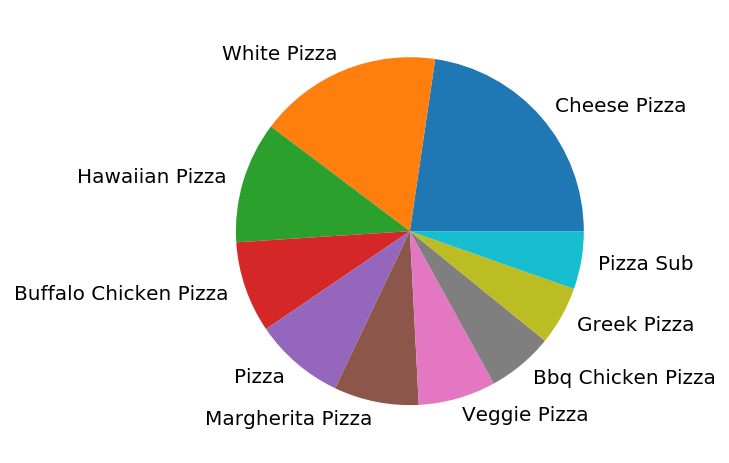

In [17]:
ax = df['menus.name'].value_counts().nlargest(10).plot.pie().set(xlabel='', ylabel='')

In [18]:
unique_restaurants = df.groupby('id').first()


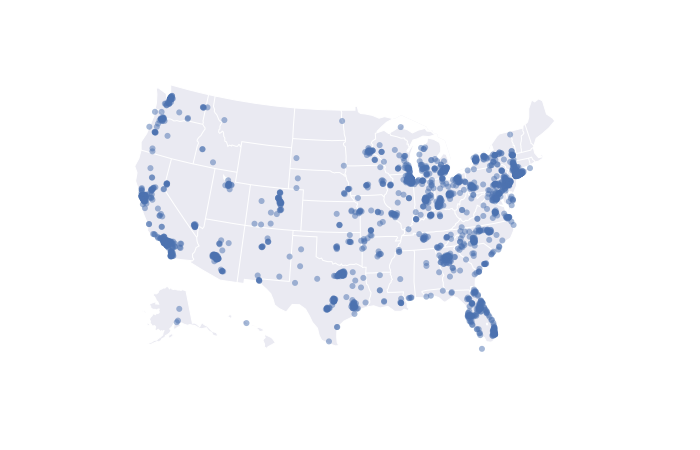

In [19]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'
fig = px.scatter_geo(unique_restaurants, lat = 'latitude', lon = 'longitude', \
                     scope = 'usa', template = 'seaborn', opacity = 0.5)
fig.show()


In [20]:
pop = pd.read_csv("../data/SCPRC-EST2018-18+POP-RES.csv", usecols = ['NAME','POPESTIMATE2018'])
population = pop.iloc[1:52].set_index('NAME').to_dict()['POPESTIMATE2018']


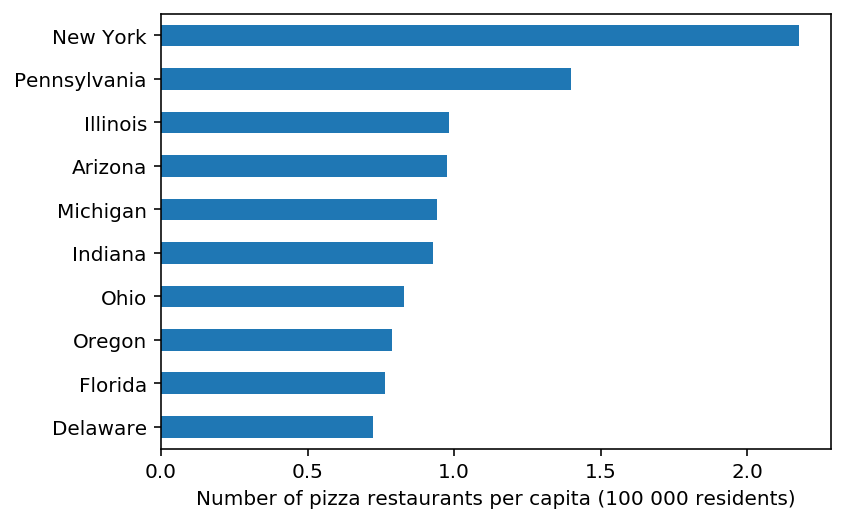

In [21]:
unique_restaurants['per_cap'] = unique_restaurants.apply(lambda row: 100000/population[row['state']], axis=1)
ax = unique_restaurants.groupby('state')['per_cap'].sum().nlargest(10).sort_values().plot.barh()\
    .set(xlabel='Number of pizza restaurants per capita (100 000 residents)', ylabel='')
